In [400]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.utils import shuffle

df = pd.read_csv('./Ames_HousePrice.csv', index_col=0)
ames = pd.read_csv('./Ames_HousePrice.csv', index_col=0)

## Import Ames Data and prepare Notebook Settings

In [401]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [402]:
ames.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


### For some reason the outcome was better with the PID intact

In [20]:
# DROP PID COLUMN
#ames = ames.drop(columns=['PID'])

In [403]:
ames.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


### Continue EDA:  Display Distrubution of SalePrice</br>Compare with Log Transform

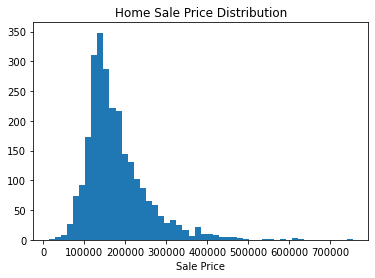

In [405]:
# CREATE DENSITY PLOT FOR SALEPRICE
plt.hist(ames['SalePrice'],bins=50)
plt.title('Home Sale Price Distribution')
plt.xlabel('Sale Price');

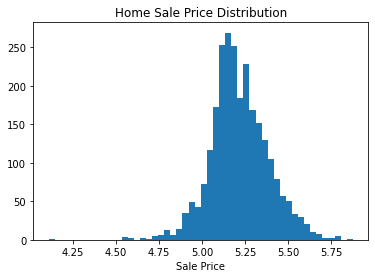

In [406]:
# CREATE DENSITY PLOT FOR LOGP(SALEPRICE)
# THE LOG TRANSFORM OF SALEPRICE
sp_xform = np.log10(ames['SalePrice'])
plt.hist(sp_xform, bins=50)
plt.title('Home Sale Price Distribution')
plt.xlabel('Sale Price');

### UPDATE SalePrice Field with log10(ames['SalePrice'])

In [407]:
ames['SalePrice'] = np.log10(ames['SalePrice'])

In [408]:
outlier = ames[ ames['SalePrice'] < 4.67 ]['SalePrice'].index.tolist()

In [409]:
outlier

[428, 496, 559, 645, 741, 855, 918, 336]

In [410]:
ames = ames.drop(index=outlier)

In [411]:
ames.shape

(2560, 81)

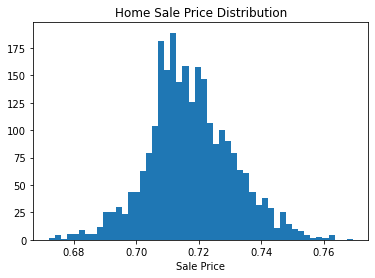

In [412]:
# CREATE DENSITY PLOT FOR LOGP(SALEPRICE)
# THE LOG TRANSFORM OF SALEPRICE
sp_xform = np.log10(ames['SalePrice'])
plt.hist(sp_xform, bins=50)
plt.title('Home Sale Price Distribution')
plt.xlabel('Sale Price');

### Inspect NULL/NaN Values in data set

In [413]:
ames.isnull().sum().sort_values(ascending=False)

PoolQC           2551
MiscFeature      2463
Alley            2396
Fence            2037
FireplaceQu      1227
                 ... 
GrLivArea           0
Heating             0
HeatingQC           0
CentralAir          0
SaleCondition       0
Length: 81, dtype: int64

In [414]:
na_cols = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageFinish','GarageCond','GarageQual',
           'GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtQual','BsmtCond','MasVnrType']

In [415]:
for col in (na_cols):
    feature = col
    ames[feature] = ames[ feature ].fillna = 'None'

In [416]:
ames.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,5.100371,30,RL,NaN,7890,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,None,None,None,None,238.0,None,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,None,None,1939.0,None,2.0,399.0,None,None,Y,0,0,0,0,166,0,None,None,None,0,3,2010,WD,Normal
2,905476230,1049,5.144574,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,149.0,Gd,TA,CBlock,None,None,None,None,552.0,None,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,None,1984.0,None,1.0,266.0,None,None,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal
3,911128020,1001,5.096562,30,C (all),60.0,6060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,None,None,None,None,737.0,None,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,None,1930.0,None,1.0,216.0,None,None,N,154,0,42,86,0,0,None,None,None,0,11,2007,WD,Normal
4,535377150,1039,5.056905,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,None,None,None,None,0.0,None,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,None,1940.0,None,1.0,281.0,None,None,N,0,0,168,0,111,0,None,None,None,0,5,2009,WD,Normal
5,534177230,1665,5.356026,60,RL,70.0,8400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,None,None,None,None,643.0,None,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,None,None,2001.0,None,2.0,528.0,None,None,Y,0,45,0,0,0,0,None,None,None,0,11,2009,WD,Normal


In [417]:
drop_columns = ['GarageArea', 'Alley', 'MiscFeature', 'MiscVal', 'PoolQC', 'PoolArea' ]

In [445]:
num_to_str = ['OverallQual','OverallCond','MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']

In [446]:
nidx = ames['Neighborhood'].isnull().index.tolist()
ames.iloc[nidx]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2,905476230,1049,5.144574,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,149.0,Gd,TA,CBlock,None,None,None,None,552.0,None,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,None,1984.0,None,1.0,266.0,None,None,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal
3,911128020,1001,5.096562,30,C (all),60.0,6060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,None,None,None,None,737.0,None,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,None,1930.0,None,1.0,216.0,None,None,N,154,0,42,86,0,0,None,None,None,0,11,2007,WD,Normal
4,535377150,1039,5.056905,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,None,None,None,None,0.0,None,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,None,1940.0,None,1.0,281.0,None,None,N,0,0,168,0,111,0,None,None,None,0,5,2009,WD,Normal
5,534177230,1665,5.356026,60,RL,70.0,8400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,None,None,None,None,643.0,None,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,None,None,2001.0,None,2.0,528.0,None,None,Y,0,45,0,0,0,0,None,None,None,0,11,2009,WD,Normal
6,908128060,1922,5.297761,85,RL,64.0,7301,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,None,500.0,Gd,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,None,None,2003.0,None,2.0,672.0,None,None,Y,0,0,177,0,0,0,None,None,None,0,7,2009,ConLD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,902110080,1389,5.130334,60,RM,60.0,3378,Pave,None,Reg,HLS,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,8,1946,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,CBlock,None,None,None,None,0.0,None,0.0,651.0,651.0,GasA,Gd,Y,SBrkr,707,682,0,0.0,0.0,1,1,3,1,TA,6,Typ,2,None,None,1947.0,None,1.0,240.0,None,None,P,0,0,126,0,0,0,None,None,None,0,9,2009,WD,Normal
767,902405120,1480,5.075547,50,RM,60.0,5400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,6,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,BrkTil,None,None,None,None,0.0,None,0.0,972.0,972.0,GasA,Ex,Y,SBrkr,1044,0,436,0.0,0.0,1,0,3,1,TA,6,Typ,0,None,None,1920.0,None,1.0,207.0,None,None,Y,0,0,176,0,0,0,None,None,None,0,9,2009,ConLI,Family
768,924100070,1389,5.230449,20,RL,77.0,10010,Pave,None,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,None,None,None,None,1071.0,None,123.0,195.0,1389.0,GasA,Gd,Y,SBrk

In [420]:
ames.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,5.100371,30,RL,NaN,7890,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,None,None,None,None,238.0,None,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,None,None,1939.0,None,2.0,399.0,None,None,Y,0,0,0,0,166,0,None,None,None,0,3,2010,WD,Normal
2,905476230,1049,5.144574,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,149.0,Gd,TA,CBlock,None,None,None,None,552.0,None,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,None,1984.0,None,1.0,266.0,None,None,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal
3,911128020,1001,5.096562,30,C (all),60.0,6060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,None,None,None,None,737.0,None,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,None,1930.0,None,1.0,216.0,None,None,N,154,0,42,86,0,0,None,None,None,0,11,2007,WD,Normal
4,535377150,1039,5.056905,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,None,None,None,None,0.0,None,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,None,1940.0,None,1.0,281.0,None,None,N,0,0,168,0,111,0,None,None,None,0,5,2009,WD,Normal
5,534177230,1665,5.356026,60,RL,70.0,8400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,None,None,None,None,643.0,None,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,None,None,2001.0,None,2.0,528.0,None,None,Y,0,45,0,0,0,0,None,None,None,0,11,2009,WD,Normal


### DATA CLEANING<br/>IMPUTE MEAN/MEDIAN COMMON METHOD

In [447]:
ames['LotFrontage'] = ames['LotFrontage'].fillna( ames['LotFrontage'].median() )
ames['GarageYrBlt'] = ames['GarageYrBlt'].fillna(ames['YearBuilt'])
ames['MasVnrArea'] = ames['MasVnrArea'].fillna(0)
ames['BsmtHalfBath'] = ames['BsmtHalfBath'].fillna(0)
ames['BsmtFullBath'] = ames['BsmtFullBath'].fillna(0)
ames['BsmtFinSF2'] = ames['BsmtFinSF2'].fillna(0)
ames['BsmtFinSF1'] = ames['BsmtFinSF1'].fillna(0)
ames['TotalBsmtSF'] = ames['TotalBsmtSF'].fillna(0)
ames['BsmtUnfSF'] = ames['BsmtUnfSF'].fillna(0)
ames['Electrical'] = ames['Electrical'].fillna(0)
ames['GarageCars'] = ames['GarageCars'].fillna(0)
ames['GarageArea'] = ames['GarageArea'].fillna(0)


### ISOLATE CATEGORICAL VARIABLES

In [448]:
categ = ['Alley','BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
          'CentralAir','Condition1','Condition2','Electrical','ExterCond','ExterQual','Exterior1st',
          'Exterior2nd','Fence','FireplaceQu','Foundation','Functional','GarageCond','GarageFinish',
          'GarageQual','GarageType','Heating','HeatingQC','HouseStyle','KitchenQual','LandContour',
          'LandSlope','LotConfig','LotShape','MSZoning','MasVnrType','MiscFeature','Neighborhood',
          'PavedDrive','PoolQC','RoofMatl','RoofStyle','SaleCondition','SaleType','Street','Utilities']

In [450]:
nested_categ = [num_to_str, categ]

In [425]:
# flatten the list
categories = [item for sublist in nested_categ for item in sublist]

In [451]:
categories

['OverallQual',
 'OverallCond',
 'MSSubClass',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'YrSold',
 'MoSold',
 'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [452]:
# MAKE COPY OF ORIGINAL FOR PRECAUTIONS
a_ames = ames.copy()

In [453]:
# DROP UNNECESSARY COLUMNS (MULTICOLLINEARITY)
drop_columns = ['GarageArea', 'Alley', 'MiscFeature', 'MiscVal', 'PoolQC', 'PoolArea' ]
a_ames.drop(columns=drop_columns, inplace=True, axis=1)

In [454]:
a_ames.loc[:,'YearBuilt':'YearRemodAdd']

,YearBuilt,YearRemodAdd
1,1939,1950
2,1984,1984
3,1930,2007
4,1900,2003
5,2001,2001
...,...,...
759,1916,1950
760,1955,1955
761,1949,1950
762,2000,2000


In [455]:
num = a_ames.loc[:, ~a_ames.columns.isin(categories)]
cat = a_ames.loc[:, a_ames.columns.isin(categories)]

In [456]:
cat2 = pd.get_dummies(cat, prefix=None, prefix_sep='_', columns=None, drop_first=False)

In [457]:
df = pd.concat([num, cat2], axis=1)

In [458]:
df.head()

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_0,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_None,GarageType_None,GarageFinish_None,GarageQual_None,GarageCond_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,909176150,856,5.100371,68.0,7890,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,2.0,0,0,0,0,166,30,6,6,1939,1950,1939.0,3,2010,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,905476230,1049,5.144574,42.0,4235,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1.0,0,105,0,0,0,120,5,5,1984,1984,1984.0,2,2009,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,911128020,1001,5.096562,60.0,6060,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1.0,154,0,42,86,0,30,5,9,1930,2007,1930.0,11,2007,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,535377150,1039,5.056905,80.0,8146,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1.0,0,0,168,0,111,70,4,8,1900,2003,1940.0,5,2009,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,534177230,1665,5.356026,70.0,8400,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2.0,0,45,0,0,0,60,8,6,2001,2001,2001.0,11,2009,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Separate numeric/categorical vars

In [459]:
X_am = df.loc[:, ~df.columns.isin(['SalePrice'])]
y_am = df['SalePrice']

In [460]:
y_am.head()

1    5.100371
2    5.144574
3    5.096562
4    5.056905
5    5.356026
Name: SalePrice, dtype: float64

In [461]:
#from sklearn.model_selection import train_test_split
from sklearn import linear_model

ridge1 = Ridge(alpha=0.1, fit_intercept=True, copy_X=True, max_iter=None,
               normalize=True, tol=0.001, solver='auto', random_state=None)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_am, y_am, test_size=0.25, random_state=42)

In [55]:
ridge1.fit(X_am, y_am)

Ridge(normalize=True)

In [437]:
#ridge1.set_params(alpha=0.01)
ridge1.fit(X_train, y_train)

Ridge(alpha=0.1, normalize=True)

In [57]:
##print('The MLR Intercept is %.2f' %(ridge.intercept_))
#print('The R^2 score is %.2f' %(ridge1.score(X_am, y_am)))

The R^2 score is 0.91


In [441]:
#print('The MLR Intercept is %.5f' %(ridge.intercept_))
print('The R^2 score is %.5f' %(ridge1.score(X_train, y_train)))

The R^2 score is 0.93815


In [442]:
#ridge1.fit(X_am, y_am)
print('The R^2 score is %.5f' %(ridge1.score(X_test, y_test)))

The R^2 score is 0.93363
